<a href="https://colab.research.google.com/github/mageshkkumarrv/DataScience/blob/main/STUDENT_RESULT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Requirement:

Analyse the Dataset properly to understand on what factors student result is depending.

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('/content/Expanded_data_with_more_features.csv',encoding='ISO-8859-1')
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [25]:
df.shape

(30641, 15)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [27]:
df.drop('Unnamed: 0',inplace=True,axis=1)

In [28]:
l = list(df.columns)
for i in l:
  df[i]=df[i].fillna(method='backfill')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          30641 non-null  object 
 2   ParentEduc           30641 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             30641 non-null  object 
 5   ParentMaritalStatus  30641 non-null  object 
 6   PracticeSport        30641 non-null  object 
 7   IsFirstChild         30641 non-null  object 
 8   NrSiblings           30641 non-null  float64
 9   TransportMeans       30641 non-null  object 
 10  WklyStudyHours       30641 non-null  object 
 11  MathScore            30641 non-null  int64  
 12  ReadingScore         30641 non-null  int64  
 13  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.3+ MB


In [33]:
# Converting float into int
df['NrSiblings']=df['NrSiblings'].astype(int)
# Cleaned Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               30641 non-null  object
 1   EthnicGroup          30641 non-null  object
 2   ParentEduc           30641 non-null  object
 3   LunchType            30641 non-null  object
 4   TestPrep             30641 non-null  object
 5   ParentMaritalStatus  30641 non-null  object
 6   PracticeSport        30641 non-null  object
 7   IsFirstChild         30641 non-null  object
 8   NrSiblings           30641 non-null  int64 
 9   TransportMeans       30641 non-null  object
 10  WklyStudyHours       30641 non-null  object
 11  MathScore            30641 non-null  int64 
 12  ReadingScore         30641 non-null  int64 
 13  WritingScore         30641 non-null  int64 
dtypes: int64(4), object(10)
memory usage: 3.3+ MB


# **Ethnic Group**

<Axes: ylabel='EthnicGroup'>

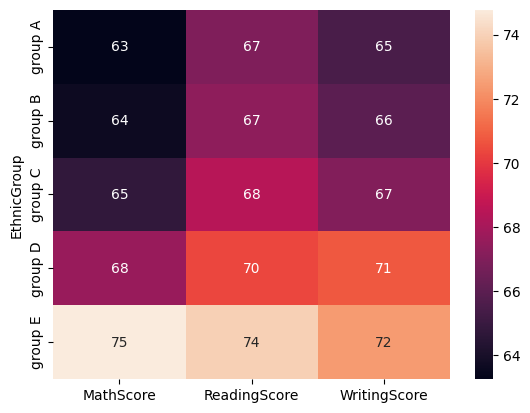

In [35]:
eg = df.pivot_table(values=['MathScore','ReadingScore','WritingScore'],index='EthnicGroup')
sns.heatmap(eg,annot=True)

**Conclusion 1 (Based on Ethnic Group)**: Based on the above analysis the students of **Ethnic Group E have high scores on all aspects, followed by Group D**

# **Parent Education**

<Axes: ylabel='ParentEduc'>

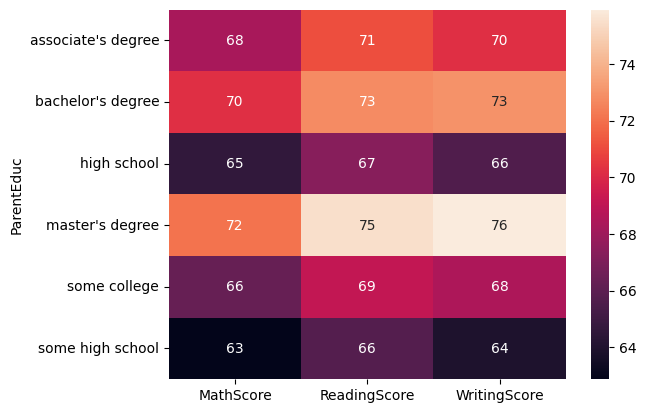

In [38]:
pe = df.pivot_table(values=['MathScore','ReadingScore','WritingScore'],index='ParentEduc')
sns.heatmap(pe,annot=True)

**Conclusion 2 (Parent's Education):** Based on the above analysis the parent's who had did Master's Degree and Bachelor's Degree their childrens are scoring high marks compared to other students.

# **Lunch Type**

<Axes: ylabel='LunchType'>

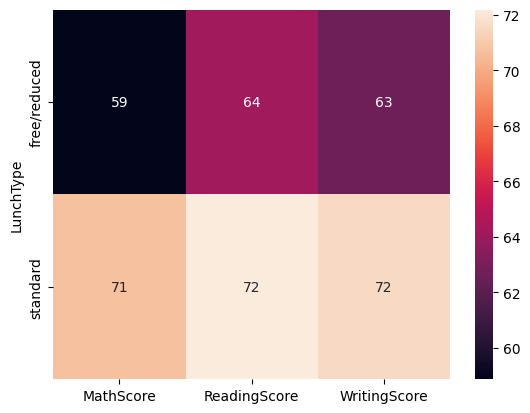

In [39]:
lt = df.pivot_table(values=['MathScore','ReadingScore','WritingScore'],index='LunchType')
sns.heatmap(lt,annot=True)

**Conclusion 3(Lunch Type):** Based on the above analysis, Students having **Standard** Lunch Type have good scores in all aspects.

# **Test Preparation**

<Axes: ylabel='TestPrep'>

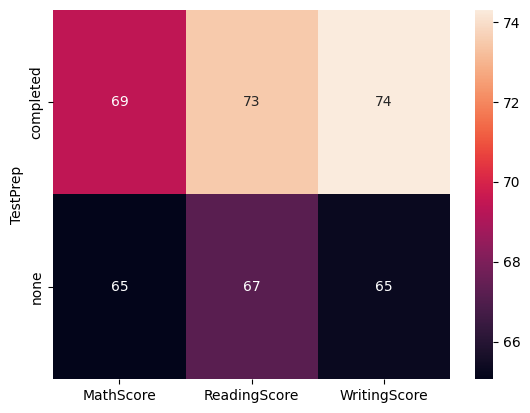

In [40]:
tp = df.pivot_table(values=['MathScore','ReadingScore','WritingScore'],index='TestPrep')
sns.heatmap(tp,annot=True)

**Conclusion 4 (Test Preparation):** Based on the above analysis the students who have **Completed Test Preparation** have good scores.

# **Parent Marital Status**

<Axes: ylabel='ParentMaritalStatus'>

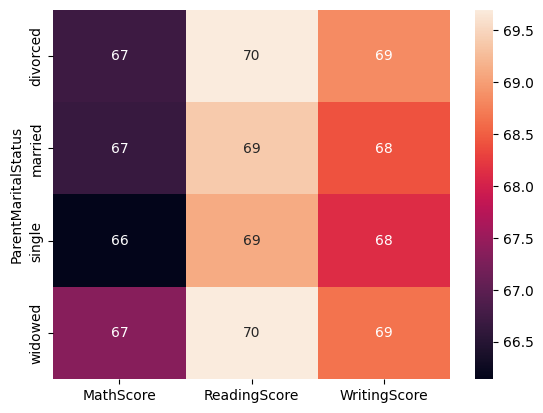

In [41]:
pms = df.pivot_table(values=['MathScore','ReadingScore','WritingScore'],index='ParentMaritalStatus')
sns.heatmap(pms,annot=True)

**Conclusion 5 (Parent Marital Status):** Based on above analysis there is no much impact on Parent's Marital Status.

# **Practice Sport**

<Axes: ylabel='PracticeSport'>

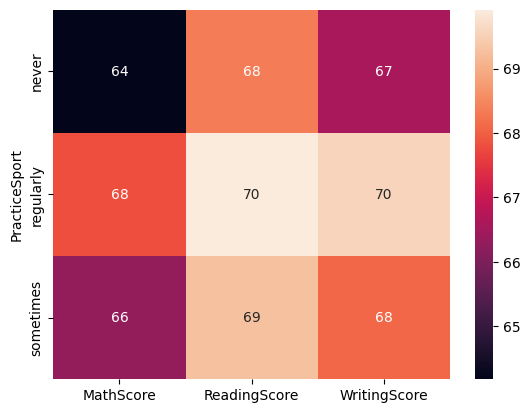

In [42]:
ps = df.pivot_table(values=['MathScore','ReadingScore','WritingScore'],index='PracticeSport')
sns.heatmap(ps,annot=True)

**Conclusion 6 (Practice Sport):** Based on above analysis students those who Practice Sport **Regularly** have much impact on Scores.

# **Is First Child**

<Axes: ylabel='IsFirstChild'>

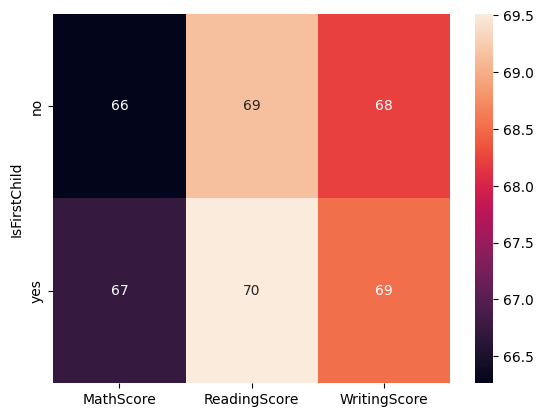

In [43]:
ifc = df.pivot_table(values=['MathScore','ReadingScore','WritingScore'],index='IsFirstChild')
sns.heatmap(ifc,annot=True)

**Conclusion 7 (Is First Child):** Based on above analysis there is no much impact on score though **he/she is first child or not**.

# **Number of Siblings**

<Axes: ylabel='NrSiblings'>

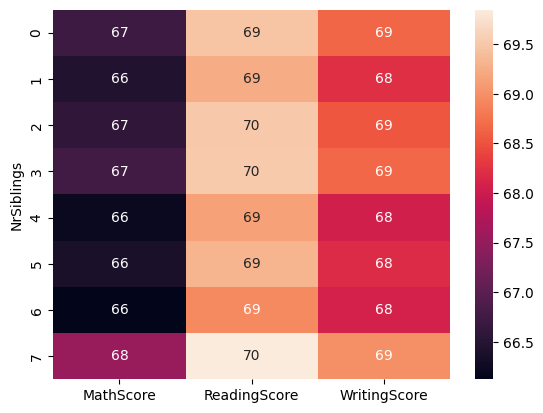

In [44]:
ns = df.pivot_table(values=['MathScore','ReadingScore','WritingScore'],index='NrSiblings')
sns.heatmap(ns,annot=True)

**Conclusion 8 (No of Siblings):** Based on above analysis there is **no much impact** of Students Scores Based on Siblings Count.

# **TransportMeans**

<Axes: ylabel='TransportMeans'>

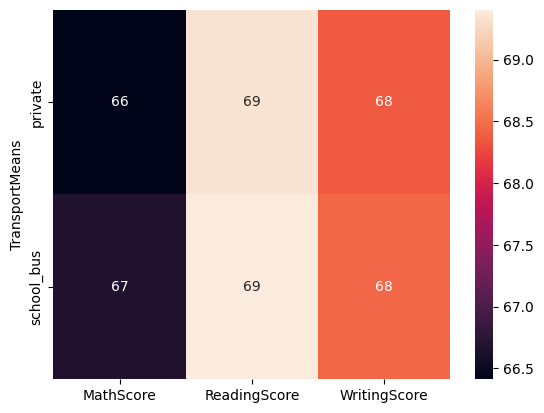

In [45]:
tm = df.pivot_table(values=['MathScore','ReadingScore','WritingScore'],index='TransportMeans')
sns.heatmap(tm,annot=True)

**Conclusion 9 (Transport Mean):** Based on above analysis there is **no much impact** of Student's Score Based on Transport.

# **Weekly Study Hours**

<Axes: ylabel='WklyStudyHours'>

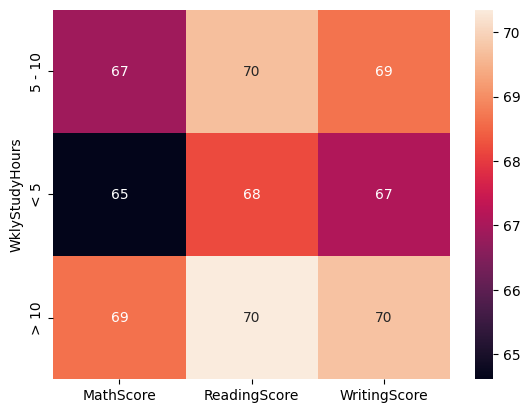

In [46]:
wsh = df.pivot_table(values=['MathScore','ReadingScore','WritingScore'],index='WklyStudyHours')
sns.heatmap(wsh,annot=True)

**Conclusion 10 (Weekly Study Hours):** Based on above analysis the **Students who Studies more than 10 hrs and > 5hrs weekly** Scores good.

**Final Conclusion:**

1. Based on the above analysis, its concluded that the students of **Ethnic Group E have high scores on all aspects, followed by Group D**.

2. Considering **Parent's Education**, **the parent's with Master's Degree and Bachelor's Degree their childrens are scoring high marks** compared to other students.

3. Considering **Lunch Type** Students having **Standard Lunch Type** have good scores in all aspects.

4. Considering **Test Preparation**, Students who have **Completed Test Preparation** have good scores.

5. Considering **Sports** who Practice Sport **Regularly** have much impact on Scores.

6. Considering **Weekly Study Hours**, **Students who Studies more than 10 hrs and > 5hrs weekly** Scores good.